In [1]:
import multiprocessing   as mp
import numpy             as np

import gym
import Portfolio_Gym
import A2C_VI_TF as A2C
import Factors_Wrapper as Wrapper

# Single Asset Merton Model

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)
100%|██████████| 10000/10000 [03:48<00:00, 43.75it/s]


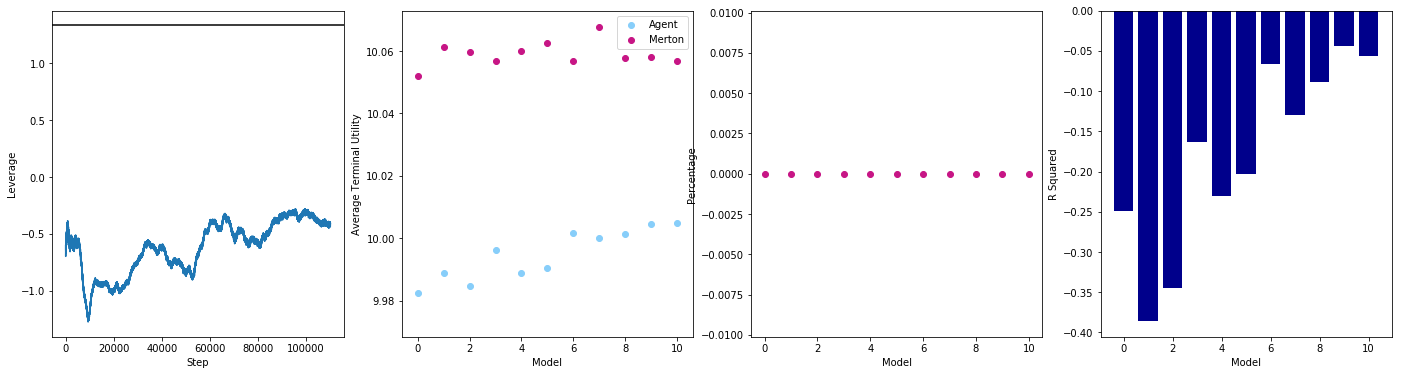

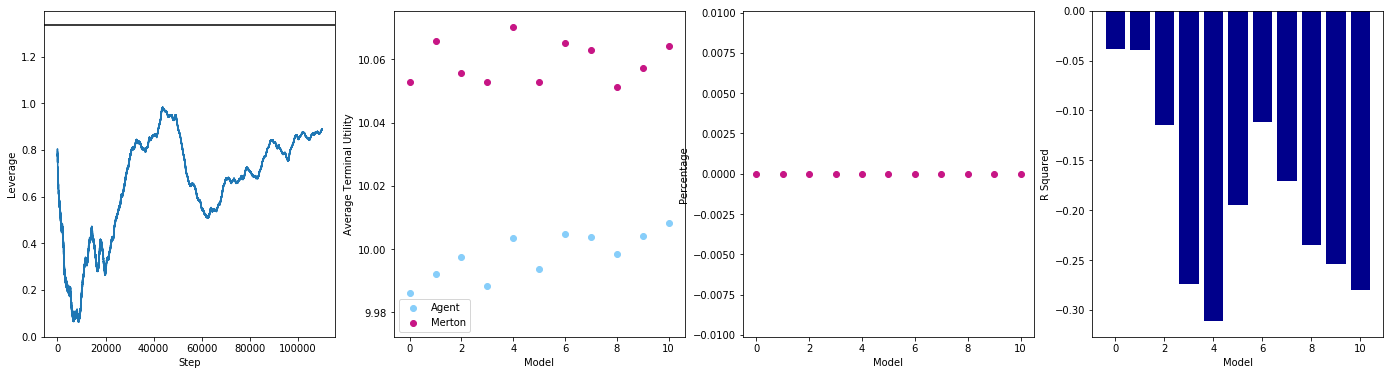

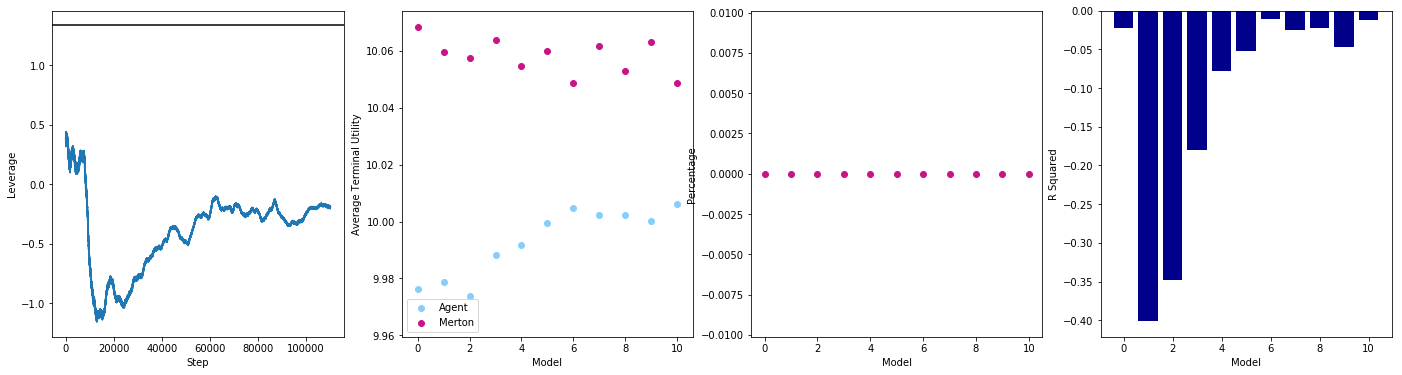

In [3]:
# Model Parameters.
Gamma  = 0.999
N_Eps  = int(1e4)

Network_Hypers   = {"Learning_Rate" : 0.001,
                    "Epoch"         : 20,
                    "Network_Size"  : [32, 16],
                    "Activation"    : "Sigmoid",
                    "Solver"        : "ADAM",
                    "Actor_Alpha"   : 0.0,
                    "Critic_Alpha"  : 0.1,
                    "Batch_Size"    : 0}


# Function to facilitate mulitprocessing.
def Run(seed):
    np.random.seed(seed)
    Merton_Env = gym.make('Simulated-v0')
    Merton_Env.Set_Params(Mu = 0.01, Sigma = 0.11, Row = 1, Rf = 0.0052,
                          Max_Leverage  = 750,
                          Min_Leverage  = -750,
                          Time_Horizon  = 1,
                          Time_Step     = 1/12,
                          Risk_Aversion = 0.9,
                          State_Corrolations = [0.2, -0.5])
 
    myAC = A2C.Actor_Critic(Merton_Env, Network_Hypers, Gamma = Gamma, 
                            Sigma_Range = [2, 0.05], Sigma_Anneal = 0.9, 
                            Predict_Sigma = False, Retrain_Frequency = 5)
    
    myWrapper = Wrapper.Factors_Wrapper(myAC)
    myWrapper.Train(N_Eps, Plot = ['Mu', 'R_Squared', 'Merton_Benchmark', 'Percent_Merton_Action'])


# Run the investigation...
with mp.Pool(mp.cpu_count()) as pool:
    _ = pool.map(Run, np.random.randint(0, int(1e9), 3))
